In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



a. Loading and preprocessing the image data

In [2]:
mnist_train=pd.read_csv('./mnist_train.csv')
x_train=mnist_train.drop('label',axis=1).values
y_train=mnist_train['label'].values

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [3]:
mnist_test=pd.read_csv('./mnist_test.csv')
x_test=mnist_test.drop('label',axis=1).values
y_test=mnist_test['label'].values

print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [4]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

b. Defining the model's architecture

In [6]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\ADMIN\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c. Training the model

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9022 - loss: 0.3232 - val_accuracy: 0.9843 - val_loss: 0.0490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9847 - loss: 0.0498 - val_accuracy: 0.9863 - val_loss: 0.0394
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9901 - loss: 0.0320 - val_accuracy: 0.9889 - val_loss: 0.0318
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9932 - loss: 0.0219 - val_accuracy: 0.9924 - val_loss: 0.0253
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9949 - loss: 0.0156 - val_accuracy: 0.9913 - val_loss: 0.0281


d. Estimating the model's performance

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9885 - loss: 0.0368
Test accuracy: 0.9912999868392944


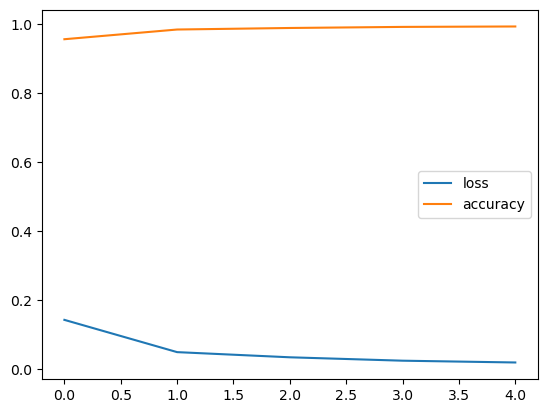

In [9]:
plt.plot(history.history['loss'],label=('loss'))
plt.plot(history.history['accuracy'],label=('accuracy'))
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Actual Number:  0
Predicted Number:  0


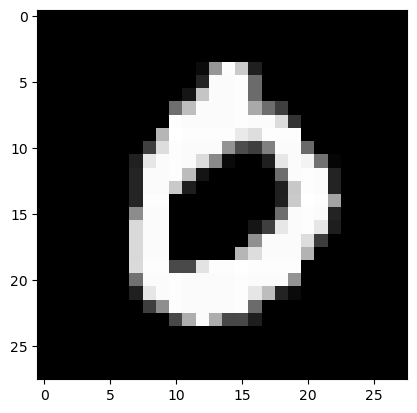

In [10]:
n = 3
plt.imshow(x_test[n].reshape(28, 28), "gray")

predicted_value = model.predict(x_test)

print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))